In [867]:
import numpy as np
import pandas as pd
from datetime import datetime
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [868]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Understanding the dataset

In [869]:
# Read the csv file using 'read_csv'
CarPrice = pd.read_csv('CarPrice_Assignment.csv',low_memory=False)

In [870]:
# Understanding the count of records- in terms of rows and columns
CarPrice.shape

(205, 26)

In [871]:
# Understanding the data and its datatype
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [872]:
# Understanding the dataframe columns
CarPrice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Cleaning

In [873]:
# Remove duplicate rows in the Dataset
CarPrice = (CarPrice.drop_duplicates(['car_ID'], keep ='last'));

In [874]:
# Remove columns which has only one unique Value
CarPrice = CarPrice.loc[:, (CarPrice != CarPrice.iloc[0]).any()] 

In [875]:
# Remove columns which has NA values
CarPrice = CarPrice.dropna(axis=1,how='all')

In [876]:
#Calculate the percentage of null values
round(100*(CarPrice.isnull().sum()/len(CarPrice.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

# Exploratory data analysis

In [877]:
# Check the head of the dataset to inspect the various aspects of the housing dataframe
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [878]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


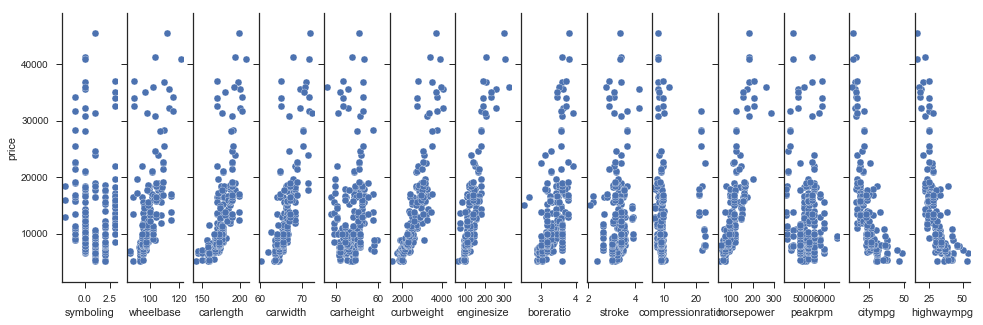

In [879]:
# Visualising Numeric Variables relationship with price variable
pp = sns.pairplot(data=CarPrice,
                  y_vars=['price'],
                  x_vars=['symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                          'compressionratio','horsepower','peakrpm','citympg','highwaympg'])
pp.fig.set_size_inches(13,6)

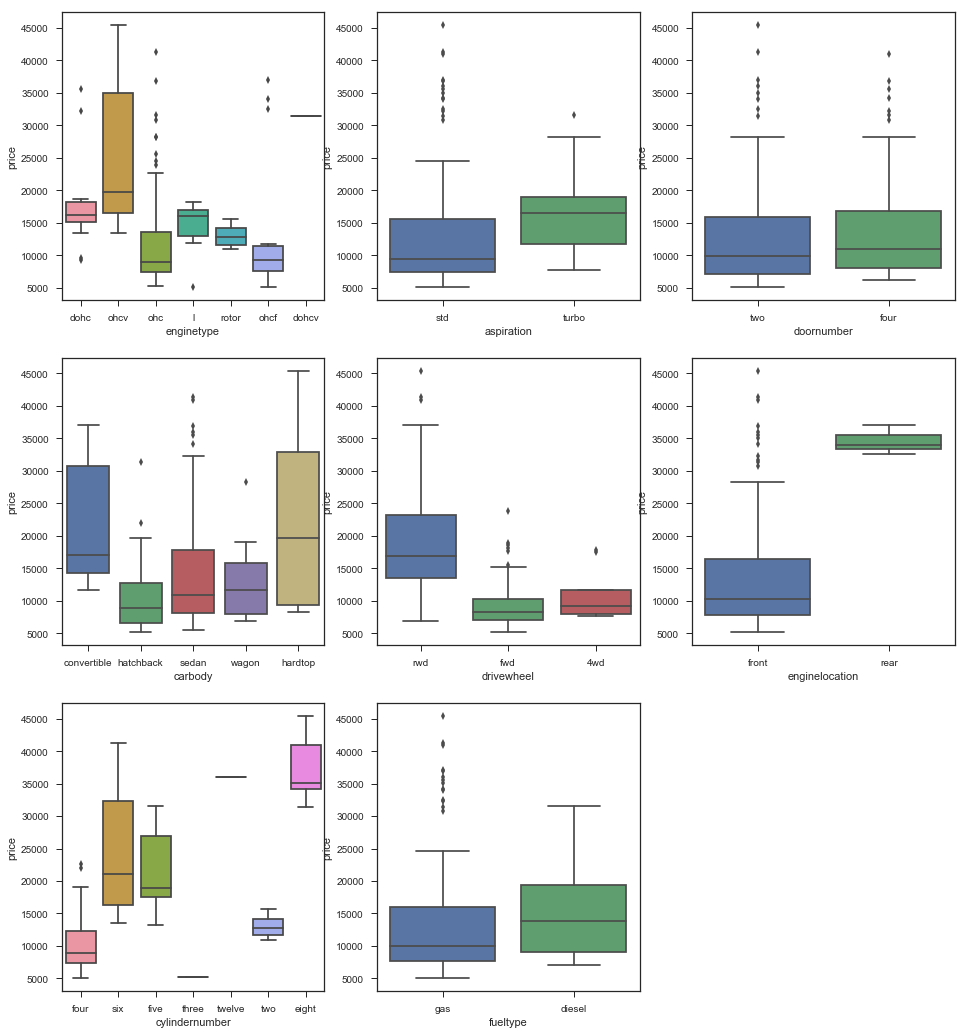

In [880]:
# Visualising Categorical Variables relationship with price variable
plt.figure(figsize=(16,18))
plt.subplot(3,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.show()

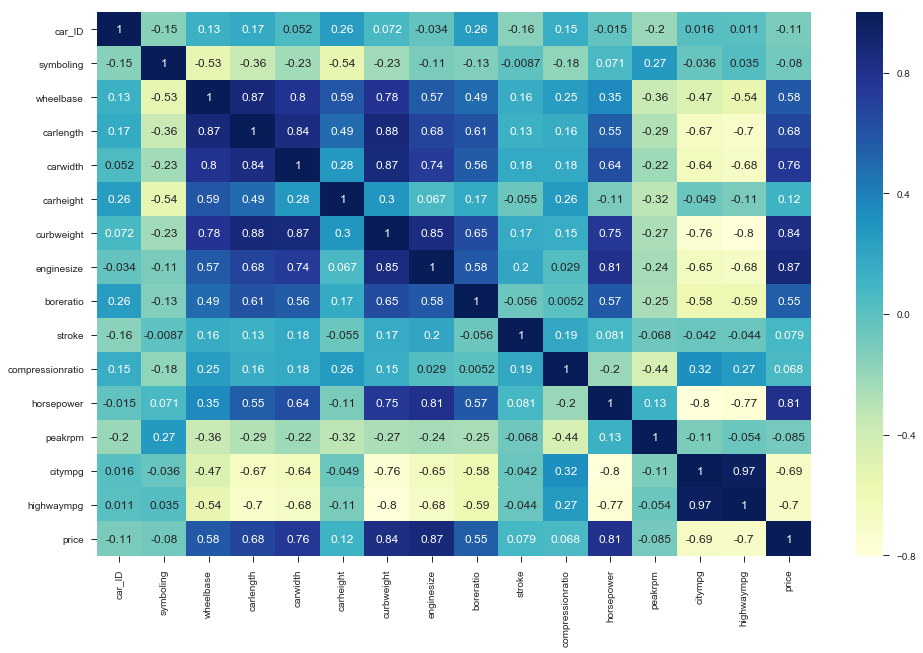

In [881]:
# PLot to see the correlation of the variables
plt.figure(figsize = (16, 10))
sns.heatmap(CarPrice.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Data Preparation

In [882]:
# Removing column with no significance based on the visualization
CarPrice=CarPrice.drop('car_ID',axis=1)
CarPrice=CarPrice.drop('symboling',axis=1)

In [883]:
# Split 'CarName' column to CarCompany and Carmodel column 
CarPrice[['CarCompany','CarModel']] = CarPrice['CarName'].str.split(' ',1, expand=True)

In [884]:
#Replace the CarCompany to ensure the names are unique
CarPrice["CarCompany"]= CarPrice["CarCompany"].replace({"toyouta":"toyota", "Nissan":"nissan" ,"maxda":"mazda","porcshce":"porsche","vokswagen":"volkswagen","vw":"volkswagen"})                                                     

In [885]:
# Convert the 'doornumber' variable to numeric variable
CarPrice[['doornumber']] = CarPrice['doornumber'].apply(lambda doornumber: '2' if doornumber == "two" else "4")

In [886]:
# Convert the cylinder variable to numeric variable
CarPrice['cylindernumber'] = CarPrice['cylindernumber'].replace(to_replace=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], value=[2,3,4,5,6,8,12])

In [887]:
# Convert the 'aspiration' category variable to numeric variable
CarPrice[['aspiration']] = CarPrice['aspiration'].apply(lambda aspiration: 0 if aspiration == "std" else 1)

In [888]:
# Convert the 'enginelocation' category variable to numeric variable
CarPrice[['enginelocation']] = CarPrice['enginelocation'].apply(lambda enginelocation: 1 if enginelocation == "rear" else 0)

# Creation of Dummy Variables

In [889]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel'
fuel_type = pd.get_dummies(CarPrice['fueltype'])

# Let's drop the first column from Car_Company df using 'drop_first = True'
fuel_type = pd.get_dummies(CarPrice['fueltype'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, fuel_type], axis = 1)
CarPrice.drop(['fueltype'], axis = 1, inplace = True)


In [890]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel'
fuel_system = pd.get_dummies(CarPrice['fuelsystem'])

# Let's drop the first column from Car_Company df using 'drop_first = True'
fuel_system = pd.get_dummies(CarPrice['fuelsystem'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, fuel_system], axis = 1)
CarPrice.drop(['fuelsystem'], axis = 1, inplace = True)

In [891]:
# Get the dummy variables for the feature 'CarCompany' and store it in a new variable - 'Car_Company'
Car_Company = pd.get_dummies(CarPrice['CarCompany'])

# Let's drop the first column from Car_Company df using 'drop_first = True'
Car_Company = pd.get_dummies(CarPrice['CarCompany'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, Car_Company], axis = 1)
CarPrice.drop(['CarCompany'], axis = 1, inplace = True)
CarPrice.drop(['CarName'], axis = 1, inplace = True)
CarPrice.drop(['CarModel'], axis = 1, inplace = True)


In [892]:
# Create dummy variables for the feature 'enginetype' and store it in a new variable - 'car_body'
engine_type = pd.get_dummies(CarPrice['enginetype'])

# Let's drop the first column from engine_type df using 'drop_first = True'
engine_type = pd.get_dummies(CarPrice['enginetype'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, engine_type], axis = 1)
CarPrice.drop(['enginetype'], axis = 1, inplace = True)

In [893]:
# Create dummy variables for the feature 'carbody' and store it in a new variable - 'car_body'
car_body = pd.get_dummies(CarPrice['carbody'])

# Let's drop the first column from car_body df using 'drop_first = True'
car_body = pd.get_dummies(CarPrice['carbody'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, car_body], axis = 1)
CarPrice.drop(['carbody'], axis = 1, inplace = True)

In [894]:
# Create dummy variables for the feature 'drivewheel' and store it in a new variable - 'drive_wheel'
drive_wheel = pd.get_dummies(CarPrice['drivewheel'])

# Let's drop the first column from drive_wheel df using 'drop_first = True'
drive_wheel = pd.get_dummies(CarPrice['drivewheel'], drop_first = True)                          

# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, drive_wheel], axis = 1)
CarPrice.drop(['drivewheel'], axis = 1, inplace = True)

# Feature Rescaling 

In [895]:
# Applying scaler() to all the columns except the 'dummy' variables
num_vars = ['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','cylindernumber','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','aspiration','enginelocation']

CarPrice[num_vars] = scaler.fit_transform(CarPrice[num_vars])

# Dividing the Dataset to train and test set

In [896]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

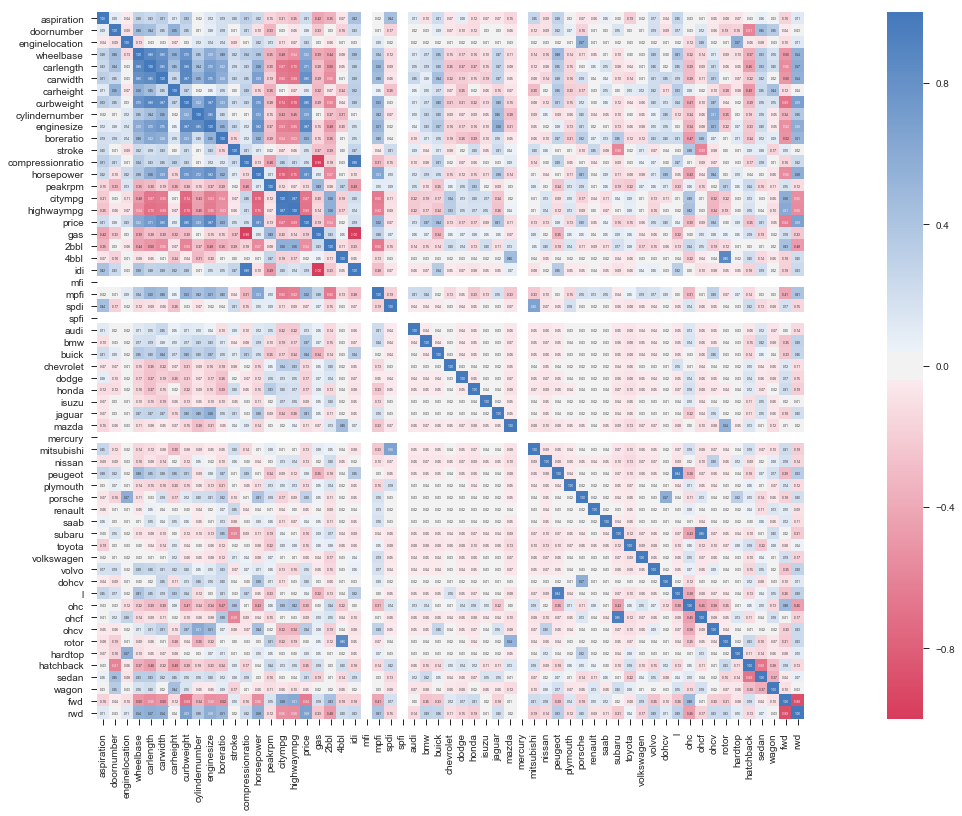

In [897]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,13))

corr=sns.heatmap(df_train.corr(), cbar=True, 
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=sns.diverging_palette(5, 250, as_cmap=True))
plt.show()

In [898]:
# Removing column with no significance based on the visualization with only one value
df_train=df_train.drop('mercury',axis=1)
df_train=df_train.drop('spfi',axis=1)
df_train=df_train.drop('mfi',axis=1)

In [899]:
# Create a correlatiojn matrix to the relationship between the variables
pd.set_option('display.max_columns', None)
df_train.corr(method ='pearson').head(16)

,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mpfi,spdi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,hardtop,hatchback,sedan,wagon,fwd,rwd
aspiration,1.000000,0.089642,-0.039559,0.277414,0.234925,0.307027,0.111052,0.325634,-0.024279,0.115050,0.186639,0.199580,0.307006,0.222900,-0.152424,-0.206821,-0.252367,0.206540,-0.418546,-0.345651,-0.069007,0.418546,-0.016600,0.443937,0.107676,-0.098653,0.206380,-0.069007,0.082211,-0.122169,-0.069007,-0.069007,-0.149071,0.251126,-0.094287,0.279715,0.029988,-0.069007,-0.056143,0.057505,-2.832792e-18,-0.190089,-0.022917,0.172642,-0.039559,0.251126,-0.031944,-0.011890,-0.047510,-0.079968,-0.069007,-0.034730,0.059409,0.029136,-0.164489,0.110608
doornumber,0.089642,1.000000,-0.094565,0.462232,0.436645,0.245854,0.554436,0.251023,0.006743,0.081539,0.183979,-0.014726,0.214898,-0.101487,-0.333523,-0.034440,-0.064721,0.075936,-0.231626,0.030365,-0.164957,0.231626,-0.006944,-0.165569,0.015551,-0.025056,0.092233,-0.066670,-0.095313,-0.118033,0.031617,0.031617,-0.062361,-0.118033,-0.086841,0.216025,0.065114,-0.164957,-0.014260,0.031617,1.504513e-01,0.032944,0.005478,0.185712,-0.094565,0.171980,-0.025029,0.116173,-0.060031,-0.191160,-0.164957,-0.605838,0.450106,0.347369,-0.044536,-0.028713
enginelocation,-0.039559,-0.094565,1.000000,-0.127454,-0.030193,-0.031943,-0.067534,0.033473,0.115932,0.141901,0.139578,-0.094329,-0.012263,0.221431,0.134722,-0.105445,-0.070935,0.226217,0.026537,-0.061532,-0.012284,-0.026537,0.094565,-0.017562,-0.015974,-0.017562,-0.015974,-0.012284,-0.017562,-0.021748,-0.012284,-0.012284,-0.026537,-0.021748,-0.027646,-0.020428,-0.014236,0.573270,-0.009995,-0.012284,-2.422508e-02,-0.033839,-0.019039,-0.017562,-0.007042,-0.021748,-0.123840,0.277269,-0.021748,-0.014236,0.573270,-0.060588,-0.079906,-0.032849,-0.101590,0.114449
wheelbase,0.277414,0.462232,-0.127454,1.000000,0.877909,0.796888,0.555524,0.792815,0.353865,0.588600,0.482386,0.224970,0.341651,0.382758,-0.347757,-0.476317,-0.542295,0.622591,-0.393481,-0.438523,-0.079417,0.393481,0.338923,-0.117645,0.113322,0.172967,0.353620,-0.149230,-0.169896,-0.163380,-0.100771,0.266365,-0.110961,-0.142053,-0.157336,0.481538,-0.137718,-0.108163,-0.048575,0.014215,-1.013949e-01,-0.004621,-0.026522,0.288038,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,-0.103235,-0.371606,0.333352,0.162160,-0.499023,0.538721
carlength,0.234925,0.436645,-0.030193,0.877909,1.000000,0.846307,0.454721,0.881495,0.444725,0.702794,0.620436,0.176814,0.227958,0.564588,-0.301036,-0.674112,-0.704482,0.713749,-0.275886,-0.502693,-0.051502,0.275886,0.501706,-0.094743,0.152884,0.193647,0.303900,-0.250506,-0.268665,-0.266420,-0.146728,0.274602,-0.078316,-0.119850,-0.077103,0.346285,-0.150217,-0.026237,0.054390,0.153722,-8.065827e-02,-0.040208,-0.005208,0.256437,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682,-0.049558,-0.456829,0.333683,0.195750,-0.549343,0.567900
carwidth,0.307027,0.245854,-0.031943,0.796888,0.846307,1.000000,0.245022,0.873884,0.551387,0.754925,0.580962,0.233631,0.249516,0.685051,-0.188153,-0.652871,-0.680451,0.799380,-0.293054,-0.551596,-0.009279,0.293054,0.460851,-0.063850,0.245014,0.080001,0.436530,-0.221580,-0.193474,-0.145629,-0.188408,0.271578,-0.046504,-0.075155,-0.144592,0.281075,-0.156830,0.178696,0.038331,0.043796,-1.027447e-01,-0.136127,-0.014381,0.209624,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753,-0.068989,-0.224067,0.222689,0.019073,-0.500816,0.539726
carheight,0.111052,0.554436,-0.067534,0.555524,0.454721,0.245022,1.000000,0.272388,-0.023488,0.045042,0.160835,0.003588,0.289830,-0.151952,-0.358919,-0.006993,-0.073803,0.096631,-0.320231,-0.067042,-0.238523,0.320231,0.047857,-0.263335,0.050878,0.104835,0.173316,-0.069518,-0.2460

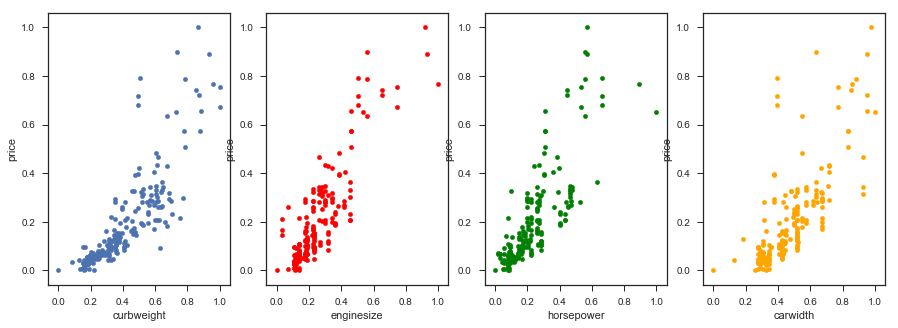

In [900]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(15, 5))
CarPrice.plot(kind='scatter',x='curbweight',y='price',ax=axes[0])
CarPrice.plot(kind='scatter',x='enginesize',y='price',ax=axes[1],color='red')
CarPrice.plot(kind='scatter',x='horsepower',y='price',ax=axes[2],color='green')
CarPrice.plot(kind='scatter',x='carwidth',y='price',ax=axes[3],color='orange') 

In [901]:
CarPrice.shape

(205, 59)

In [902]:
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,gas,2bbl,4bbl,idi,mpfi,spdi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,hardtop,hatchback,sedan,wagon,fwd,rwd
122,0.0,1.0,0.0,0.206997,0.391045,0.291667,0.250000,0.272692,0.2,0.139623,0.307143,0.552381,0.15000,0.083333,0.551020,0.500000,0.578947,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
125,0.0,0.0,0.0,0.230321,0.414925,0.666667,0.200000,0.500388,0.2,0.339623,1.000000,0.495238,0.15625,0.395833,0.551020,0.166667,0.289474,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
166,0.0,0.0,0.0,0.230321,0.411940,0.308333,0.400000,0.314973,0.2,0.139623,0.500000,0.480952,0.15000,0.266667,1.000000,0.361111,0.342105,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
199,1.0,1.0,0.0,0.516035,0.711940,0.575000,0.808333,0.647401,0.2,0.260377,0.771429,0.514286,0.03125,0.475000,0.387755,0.111111,0.157895,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1


## RFE
Recursive feature elimination

In [903]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [904]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [905]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aspiration', True, 1),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 10),
 ('gas', True, 1),
 ('2bbl', False, 22),
 ('4bbl', False, 2),
 ('idi', True, 1),
 ('mpfi', False, 19),
 ('spdi', False, 18),
 ('audi', False, 13),
 ('bmw', True, 1),
 ('buick', False, 20),
 ('chevrolet', False, 7),
 ('dodge', False, 4),
 ('honda', False, 8),
 ('isuzu', False, 15),
 ('jaguar', False, 9),
 ('mazda', False, 17),
 ('mitsubishi', True, 1),
 ('nissan', False, 14),
 ('peugeot', True, 1),
 ('plymouth', False, 5),
 ('porsche', True, 1),
 ('renault', False, 11),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 16),
 ('volkswagen',

In [906]:
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'gas', 'idi',
       'bmw', 'mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru', 'dohcv',
       'l', 'ohcf', 'rotor', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [907]:
X_train.columns[~rfe.support_]

Index(['doornumber', 'carheight', 'highwaympg', '2bbl', '4bbl', 'mpfi', 'spdi',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'nissan', 'plymouth', 'renault', 'toyota', 'volkswagen',
       'volvo', 'ohc', 'ohcv', 'fwd', 'rwd'],
      dtype='object')

In [908]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


## Model building -1

In [909]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     92.68
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.03e-65
Time:                        07:24:34   Log-Likelihood:                 258.76
No. Observations:                 143   AIC:                            -459.5
Df Residuals:                     114   BIC:                            -373.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1736      0.073  

## Model building - 2
### Eliminating feature - 'Gas'
Gas has high p value 0.738

In [910]:
X_train_new = X_train_rfe.drop(["gas"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     92.68
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.03e-65
Time:                        07:24:34   Log-Likelihood:                 258.76
No. Observations:                 143   AIC:                            -459.5
Df Residuals:                     114   BIC:                            -373.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1550      0.081  

## Model building - 3
### Eliminating feature - 'carlength'

carlength feature has high p value 0.323

In [911]:

X_train_new = X_train_new.drop(["carlength"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     96.09
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.68e-66
Time:                        07:24:35   Log-Likelihood:                 258.15
No. Observations:                 143   AIC:                            -460.3
Df Residuals:                     115   BIC:                            -377.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1436      0.080  

# Model building - 4
### Eliminating feature - 'horsepower'

horsepower feature has high p value 0.127


In [912]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     98.53
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.35e-67
Time:                        07:24:35   Log-Likelihood:                 256.69
No. Observations:                 143   AIC:                            -459.4
Df Residuals:                     116   BIC:                            -379.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1436      0.081  

# Model building - 5
### Eliminating feature - 'dohcv'

horsepower feature has high p value 0.232


In [913]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.06e-67
Time:                        07:24:35   Log-Likelihood:                 255.80
No. Observations:                 143   AIC:                            -459.6
Df Residuals:                     117   BIC:                            -382.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0989      0.072  

# Model building - 6
### Eliminating feature - 'idi'

idi feature has high p value 0.073

In [914]:
X_train_new = X_train_new.drop(["idi"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.12e-68
Time:                        07:24:35   Log-Likelihood:                 253.82
No. Observations:                 143   AIC:                            -457.6
Df Residuals:                     118   BIC:                            -383.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0856      0.072  

# Model building - 7
### Eliminating feature - 'compressionratio'

compressionratio feature has high p value 0.504

In [915]:
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     109.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.04e-69
Time:                        07:24:35   Log-Likelihood:                 253.55
No. Observations:                 143   AIC:                            -459.1
Df Residuals:                     119   BIC:                            -388.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1021      0.067      1.

# Model building - 8
### Eliminating feature - 'subaru'

subaru feature is less significant when compared to other features in terms of p value


In [916]:
X_train_new = X_train_new.drop(["subaru"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     109.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.04e-69
Time:                        07:24:36   Log-Likelihood:                 253.55
No. Observations:                 143   AIC:                            -459.1
Df Residuals:                     119   BIC:                            -388.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1021      0.067      1.

## Model building - 9
### Eliminating feature - 'ohcf'
ohcf has high p value 0.643


In [917]:
X_train_new = X_train_new.drop(["ohcf"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.19e-70
Time:                        07:24:37   Log-Likelihood:                 253.42
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                     120   BIC:                            -392.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1027      0.067      1.

## Model building - 10
### Eliminating feature - 'saab'
saab feature is less significant when compared to other features in terms of p value


In [918]:
X_train_new = X_train_new.drop(["saab"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.86e-70
Time:                        07:24:39   Log-Likelihood:                 251.11
No. Observations:                 143   AIC:                            -458.2
Df Residuals:                     121   BIC:                            -393.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0913      0.068      1.

# Model building - 11
### Eliminating feature - 'wheelbase'
wheelbase feature is less significant when compared to other features in terms of p value

In [919]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_11 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     119.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.72e-70
Time:                        07:24:40   Log-Likelihood:                 248.66
No. Observations:                 143   AIC:                            -455.3
Df Residuals:                     122   BIC:                            -393.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0807      0.069      1.

# Model building - 12
### Eliminating feature - 'hardtop'
hardtop feature is less significant when compared to other features in terms of p value

In [920]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_12 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.54e-70
Time:                        07:24:41   Log-Likelihood:                 246.47
No. Observations:                 143   AIC:                            -452.9
Df Residuals:                     123   BIC:                            -393.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0807      0.069      1.

# Calculating VIF for model lm_12

In [921]:
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginesize,83.22
3,curbweight,76.84
4,cylindernumber,49.42
2,carwidth,42.39
7,stroke,28.39
6,boreratio,22.86
17,sedan,14.03
9,citympg,13.63
12,peugeot,10.84
14,l,10.49


# Model building - 13
### Eliminating feature - 'cylindernumber'
cylindernumber feature has high vIF with value 49.42

In [922]:
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_13 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.72e-68
Time:                        07:24:43   Log-Likelihood:                 237.61
No. Observations:                 143   AIC:                            -437.2
Df Residuals:                     124   BIC:                            -380.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1302      0.048     -2.

## Calculating VIF for model lm_13

In [923]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,76.59
2,carwidth,40.83
4,enginesize,31.41
6,stroke,20.12
5,boreratio,16.13
16,sedan,12.49
11,peugeot,10.80
13,l,10.29
8,citympg,9.93
15,hatchback,9.07


# Model building - 14
### Eliminating feature - 'carbweight'
carbweight  feature has high vIF with value 76.59

In [924]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_14 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.38e-64
Time:                        07:24:46   Log-Likelihood:                 223.95
No. Observations:                 143   AIC:                            -411.9
Df Residuals:                     125   BIC:                            -358.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0640      0.051     -1.

# Model building - 15
### Eliminating feature - 'citympg'
citympg  feature has high p value 0.482

In [925]:
X_train_new = X_train_new.drop(["citympg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_15 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.11e-65
Time:                        07:24:47   Log-Likelihood:                 223.66
No. Observations:                 143   AIC:                            -413.3
Df Residuals:                     126   BIC:                            -363.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0409      0.039     -1.

# Model building - 16
### Eliminating feature - 'peakrpm'
citympg  feature has high p value 0.122

In [926]:
X_train_new = X_train_new.drop(["peakrpm"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_16 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.25e-65
Time:                        07:24:49   Log-Likelihood:                 222.30
No. Observations:                 143   AIC:                            -412.6
Df Residuals:                     127   BIC:                            -365.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0150      0.035     -0.

# Model building - 17
### Eliminating feature - 'stroke'
stroke  feature has high p value 0.057

In [927]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_17 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.90e-66
Time:                        07:24:50   Log-Likelihood:                 220.25
No. Observations:                 143   AIC:                            -410.5
Df Residuals:                     128   BIC:                            -366.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0526      0.029     -1.

## Calculating VIF for model lm_17

In [928]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,28.14
4,boreratio,14.23
3,enginesize,12.51
7,peugeot,10.16
9,l,9.59
12,sedan,6.24
11,hatchback,3.82
13,wagon,2.48
8,porsche,1.81
0,aspiration,1.64


# Model building - 18
### Eliminating feature - 'boreratio'
boreratio feature is less signficant feature compared to other feature with high VIF 14.23

In [929]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_18 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.66e-65
Time:                        07:24:52   Log-Likelihood:                 216.54
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     129   BIC:                            -363.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0894      0.026     -3.

## Calculating VIF for model lm_18

In [930]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,26.28
3,enginesize,11.97
6,peugeot,10.15
8,l,9.58
11,sedan,5.07
10,hatchback,3.16
12,wagon,2.00
7,porsche,1.75
0,aspiration,1.64
1,enginelocation,1.62


# Model building - 19
### Eliminating feature - 'carwidth'
carwidth feature has high VIF 26.28

In [931]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_19 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     85.99
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.00e-55
Time:                        07:24:55   Log-Likelihood:                 188.84
No. Observations:                 143   AIC:                            -351.7
Df Residuals:                     130   BIC:                            -313.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0280      0.030     -0.

# Model building - 20
### Eliminating feature - 'wagon'
wagon feature has high p value 0.242

In [932]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_20 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     93.41
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.00e-56
Time:                        07:24:56   Log-Likelihood:                 188.08
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     131   BIC:                            -316.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0576      0.017     -3.

# Model building - 21
### Eliminating feature - 'sedan'
sedan feature has high p value 0.644

In [933]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_21 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.13e-57
Time:                        07:24:57   Log-Likelihood:                 187.97
No. Observations:                 143   AIC:                            -353.9
Df Residuals:                     132   BIC:                            -321.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0627      0.013     -4.

# Model building - 22
### Eliminating feature - 'l'
l feature has high p value 1.424

In [934]:
X_train_new = X_train_new.drop(["l"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_22 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.25e-58
Time:                        07:24:58   Log-Likelihood:                 186.88
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     133   BIC:                            -324.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0610      0.013     -4.

# Model building - 23
### Eliminating feature - 'peugeot'
peugeot feature has high p value 1.424

In [935]:
X_train_new = X_train_new.drop(["peugeot"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_23 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.95e-59
Time:                        07:24:58   Log-Likelihood:                 186.26
No. Observations:                 143   AIC:                            -354.5
Df Residuals:                     134   BIC:                            -327.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0624      0.013     -4.

# Model building - 24
### Eliminating feature - 'enginelocation'
enginelocation feature has high p value 0.299

In [936]:
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_24 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-59
Time:                        07:25:00   Log-Likelihood:                 185.68
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     135   BIC:                            -331.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0618      0.013     -4.853      0.0

## Calculating VIF for model lm_24

In [937]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.64
6,hatchback,1.42
0,aspiration,1.35
3,mitsubishi,1.19
2,bmw,1.14
5,rotor,1.11
4,porsche,1.09


# Residual Analysis of the train data


Text(0.5,0,'Errors')

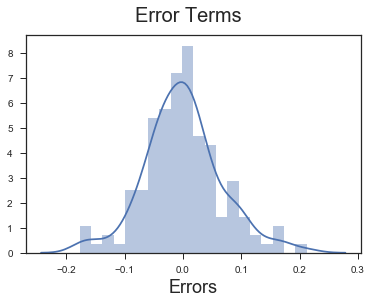

In [938]:
y_train_price = lm_24.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


# Making predictions

In [939]:
y_test = df_test.pop('price')
X_test = df_test


In [940]:
X_train_new.columns

Index(['aspiration', 'enginesize', 'bmw', 'mitsubishi', 'porsche', 'rotor',
       'hatchback'],
      dtype='object')

In [941]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm_24.predict(X_test_new)

Text(0,0.5,'y_pred')

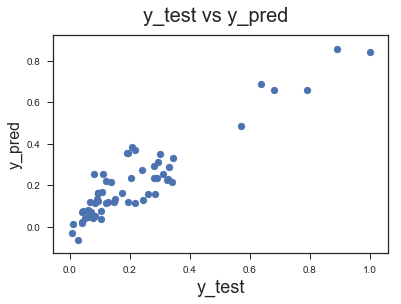

In [942]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [943]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8586036166292784

## These features can be considered by the Geely Auto

'aspiration', 
'enginesize', 
'bmw', 
'mitsubishi',
'porsche'
'rotor', 
'hatchback


# The equation of our best fitted line is:

$ price = 0.0943   \times  aspiration + 0.9866   \times  enginesize + 0.1974  \times bmw - 0.0822 \times mitsubishi + 0.2271 \times porsche + 0.2477 \times rotor - 0.0326  \times hatchback 